# NYTimes Best Sellers Data
## What trends can be found in best sellers from 2008-2016
Data pulled from http://bestsellers.barabasilab.com/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Fiction best sellers

fic = pd.read_csv('/Users/ksmith/Documents/Code/DS1/nytb2008-2016/nytb2008-2016Fiction.csv')
fic.head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2008-06-08,0553807056,0316068047,0312348673,0399154183,0385517882,0399155007,0446195979,0441015891,1416566384,...,0061160873,0307265730,0061537934,0778325504,0525950605,0061236217,0307265730,0307377040,0385515049,0345501284
1,2008-06-15,0425222195,0316068047,0553807056,0312348673,0399155007,0743290119,0399154183,0385524285,0446195979,...,006123088X,1416566384,0778325504,0061537934,0061160873,0441015891,0060829850,0307265730,0375504338,0307265730
2,2008-06-22,0385340567,0316068047,0399154973,0312348673,0425222195,0743290119,0553807056,0399155007,0399154981,...,0385524285,0446195979,006123088X,0399154183,0061537934,1400066026,0393041654,0375504338,039915504X,1416566384
3,2008-06-29,0316018708,0385340567,0316068047,0399154973,0312348673,0743290119,1416549978,0553807056,0312341814,...,0399154981,0425222195,0061537934,0061374229,0385524285,0385515049,1400066026,0385517882,1594489580,006123088X
4,2008-07-06,0312349513,0316018708,0316068047,0743290119,0312348673,0385340567,0399154973,1416549978,0061374229,...,0670018856,0553807056,0312341814,0399155007,0061537934,0425222195,0385517882,0399154981,1400066026,0446195979


In [6]:
#Nonfiction best sellers

n_fic = pd.read_csv('/Users/ksmith/Documents/Code/DS1/nytb2008-2016/nytb2008-2016Nonfiction.csv')
n_fic.head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2008-06-08,0739327302,1416954120,039306235X,0061628018,0446537519,0446537519,1416562451,0767928350,0060798718,...,1592403611,0786865652,0670020745,0312372655,006078234X,0061118184,0307338770,1594201455,0805076034,0446580503
1,2008-06-15,1586485563,0739327302,1416954120,039306235X,0061628018,0670020745,0446537519,0446537519,0385520344,...,1592403611,1416562451,0767927567,159315481X,0767928350,030740515X,0061474622,0446580503,006078234X,0618683356
2,2008-06-22,0316143472,1586485563,039306235X,0739327302,1416954120,0446537519,1592403611,0061628018,1594489947,...,1416562451,0805077928,0312372655,0670020745,0385524382,030740515X,159315481X,0060798718,0446580503,0307395634
3,2008-06-29,0316143472,1586485563,1592403611,0446581194,039306235X,0446537519,1416954120,0739327302,1594489947,...,087113988X,0375424040,0446537519,0446580503,0767928350,0805077928,159315481X,0312372655,0061628018,0307383296
4,2008-07-06,0316143472,1586485563,0446581194,1416954120,1401359652,0739327302,039306235X,1400064805,1594489947,...,1592403611,159315481X,0446537519,030740515X,0061628018,0446580503,1416950737,0061234001,0618683356,0307383296


In [7]:
#Metadata on books

info = pd.read_csv('/Users/ksmith/Documents/Code/DS1/nytb2008-2016/isbnToInfo.csv')
info.head()

,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,0316037915,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Michael Ledwidge,TICK TOCK,multi
1,0446572993,BALDACCI DAVID,Suspense/Thrillers,David Baldacci,THE INNOCENT,male
2,0385341679,MONING KAREN MARIE,Romance,Karen Marie Moning,SHADOWFEVER,female
3,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male
4,0547386079,LEHRER JONAH,Reference,Jonah Lehrer,IMAGINE,male


In [8]:
new_fic = fic.filter(['date','1'], axis=1) # Breaking DF down to only #1 best seller
new_fic.head()

,date,1
0,2008-06-08,0553807056
1,2008-06-15,0425222195
2,2008-06-22,0385340567
3,2008-06-29,0316018708
4,2008-07-06,0312349513


In [9]:
new_fic.rename(columns={'1':'isbn'},inplace=True)
new_fic.head()

,date,isbn
0,2008-06-08,0553807056
1,2008-06-15,0425222195
2,2008-06-22,0385340567
3,2008-06-29,0316018708
4,2008-07-06,0312349513


In [10]:
f1_books = pd.merge(new_fic, info, how='left', on='isbn') #Join to get meta data on books
f1_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female


In [11]:
new_n = n_fic.filter(['date','1'], axis=1) # Breaking DF down to only #1 best seller
new_n.head()

,date,1
0,2008-06-08,0739327302
1,2008-06-15,1586485563
2,2008-06-22,0316143472
3,2008-06-29,0316143472
4,2008-07-06,0316143472


In [12]:
new_n.rename(columns={'1':'isbn'},inplace=True)
new_n.head()

,date,isbn
0,2008-06-08,0739327302
1,2008-06-15,1586485563
2,2008-06-22,0316143472
3,2008-06-29,0316143472
4,2008-07-06,0316143472


In [13]:
n1_books = pd.merge(new_n, info, how='left', on='isbn') #Join to get meta data on books 
n1_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,2008-06-08,0739327302,WALTERS BARBARA,Biography/Autobiography/Memoir,Barbara Walters,AUDITION,female
1,2008-06-15,1586485563,MCCLELLAN SCOTT,History/Law/Political Science,Scott McClellan,WHAT HAPPENED,male
2,2008-06-22,0316143472,SEDARIS DAVID,Humor,David Sedaris,WHEN YOU ARE ENGULFED IN FLAMES,male
3,2008-06-29,0316143472,SEDARIS DAVID,Humor,David Sedaris,WHEN YOU ARE ENGULFED IN FLAMES,male
4,2008-07-06,0316143472,SEDARIS DAVID,Humor,David Sedaris,WHEN YOU ARE ENGULFED IN FLAMES,male


In [14]:
f1_books.isna().sum()

date             0
isbn             0
Author           0
Category         0
Author_NY        0
Title_NY         2
author_gender    3
dtype: int64

In [15]:
n1_books.isna().sum()

date             0
isbn             0
Author           0
Category         0
Author_NY        2
Title_NY         0
author_gender    0
dtype: int64

In [16]:
f1_books.Category.unique().tolist()

['Suspense/Thrillers',
 'Fantasy',
 'Mystery/Detective',
 'Romance',
 'Science Fiction',
 'Fiction General',
 'Action/Adventure',
 'Horror/Occult/Psychological',
 'Religious Fiction']

In [17]:
f1_books.Category.replace({'Suspense/Thrillers':1,
 'Fantasy':2,
 'Mystery/Detective':3,
 'Romance':4,
 'Science Fiction':5,
 'Fiction General':6,
 'Action/Adventure':7,
 'Horror/Occult/Psychological':8,
 'Religious Fiction':9}, inplace=True)

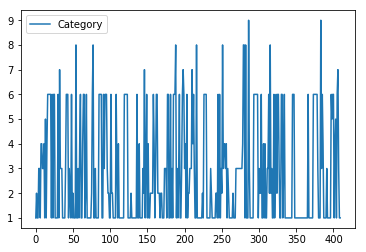

In [20]:
f1_books.plot()

In [37]:
f1_books.describe()

,Category
count,410.000000
mean,2.829268
std,2.202493
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,9.000000
